In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.basemap import Basemap
import matplotlib.image as mpimg

In [2]:
df = pd.read_csv('./data/full/exp/csv/february.csv')
df2 = pd.read_csv('./data/full/exp/csv/march.csv')
df3 = pd.read_csv('./data/full/exp/csv/august.csv')
df4 = pd.read_csv('./data/full/exp/csv/september.csv')
df5 = pd.read_csv('./data/full/exp/csv/october.csv')

In [54]:
fam1 = pd.read_csv('./data/full/exp/csv/fam_february.csv')

In [108]:
iop1.head()

,year,month,day,hour,minute,n_cluster,lon,lat,ind_x,ind_y,reflect,yyyyy_xx1,yyyyy_xx2,yyyyyyy_xx3,yyy_xx4,yyy_xx5,river,cxe,precipit,vil
0,2014.0,2.0,16.0,19.0,36.0,32.0,-59.6314,-3.8289,138.0,154.0,22.1094,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.5927,0.4738
1,2014.0,2.0,16.0,19.0,36.0,32.0,-59.6114,-3.8289,139.0,154.0,20.4531,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.2287,0.3705
2,2014.0,2.0,16.0,19.0,36.0,32.0,-59.6314,-3.8489,138.0,155.0,21.0781,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.3551,0.4079
3,2014.0,2.0,16.0,19.0,36.0,32.0,-59.6114,-3.8489,139.0,155.0,22.4844,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.6890,0.4360
4,2014.0,2.0,16.0,19.0,36.0,32.0,-59.5914,-3.8489,140.0,155.0,20.9375,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.3256,0.4214


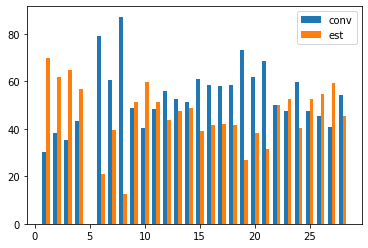

In [86]:
temp = fam1.groupby('day').agg({'convfrac': 'mean'})
v = temp.values.ravel()
a = temp.index
width = 0.35
plt.bar(a-width/2, v, width, label='conv')


temp = fam1.groupby('day').agg({'strafrac': 'mean'})
v = temp.values.ravel()
a = temp.index
plt.bar(a+width/2, v, width, label='est')

plt.legend()
plt.show()

In [66]:
np.arange(len(v))

array([    0,     1,     2, ..., 20637, 20638, 20639])

In [392]:
min(1.1, 2.1)

1.1

/home/adriano/.local/lib/python3.7/site-packages/ipykernel_launcher.py:67: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


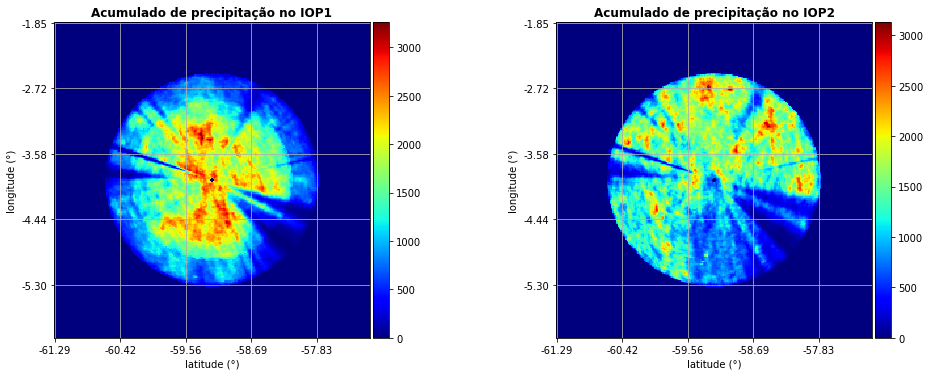

In [102]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))
fig.subplots_adjust(wspace=0.5)
xlabel = ['%.2f'%x for x in np.linspace(-62.1561, -57.8267, 6)]
ylabel = ['%.2f'%x for x in np.linspace(-0.991217, -5.30485, 6)]

mat = np.zeros((241, 241))

temp = df.groupby(['ind_x', 'ind_y']).agg({'precipit': 'sum'})
for i, row in temp.iterrows():
    x, y, v = int(i[0]), int(i[1]), row['precipit']
    mat[x][y] = row['precipit']

temp = df2.groupby(['ind_x', 'ind_y']).agg({'precipit': 'sum'})
for i, row in temp.iterrows():
    x, y, v = int(i[0]), int(i[1]), row['precipit']
    mat[x][y] = row['precipit']

ax1.set_title('Acumulado de precipitação no IOP1', fontdict={'fontweight': 'semibold'})
ax1.set_xlabel('latitude (°)')
ax1.set_ylabel('longitude (°)')
cm1 = ax1.imshow(mat, cmap='jet')
ax1.set_xticklabels(xlabel)
ax1.set_yticklabels(ylabel)
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(cm1, ax=ax1, cax=cax)

# for i, row in df.iterrows():
#     if row.ti


#--
mat = np.zeros((241, 241))

temp = df3.groupby(['ind_x', 'ind_y']).agg({'precipit': 'sum'})
for i, row in temp.iterrows():
    x, y, v = int(i[0]), int(i[1]), row['precipit']
    mat[x][y] = row['precipit']

temp = df4.groupby(['ind_x', 'ind_y']).agg({'precipit': 'sum'})
for i, row in temp.iterrows():
    x, y, v = int(i[0]), int(i[1]), row['precipit']
    mat[x][y] = row['precipit']
    
temp = df5.groupby(['ind_x', 'ind_y']).agg({'precipit': 'sum'})
for i, row in temp.iterrows():
    x, y, v = int(i[0]), int(i[1]), row['precipit']
    mat[x][y] = row['precipit']


xlabel = ['%.2f'%x for x in np.linspace(-62.1561, -57.8267, 6)]
ylabel = ['%.2f'%x for x in np.linspace(-0.991217, -5.30485, 6)]

ax2.set_title('Acumulado de precipitação no IOP2', fontdict={'fontweight': 'semibold'})
cm2 = ax2.imshow(mat, cmap='jet')
ax2.set_xticklabels(xlabel)
ax2.set_yticklabels(ylabel)
ax2.set_xlabel('latitude (°)')
ax2.set_ylabel('longitude (°)')
divider = make_axes_locatable(ax2)
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(cm2, ax=ax2, cax=cax)
ax1.grid(True)
ax2.grid(True)
fig.savefig('amount_precipitation.png', \
           bbox_inches='tight', transparent="False", pad_inches=0.1)
fig.show()

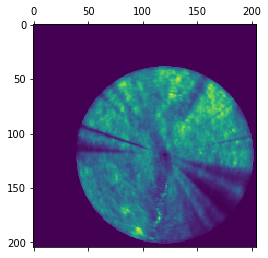

In [345]:
temp = df3.groupby(['ind_x', 'ind_y']).agg({'precipit': 'sum'})
mat = np.zeros((205, 205))
for i, row in temp.iterrows():
    x, y, v = int(i[0]), int(i[1]), row['precipit']
    mat[x][y] += row['precipit']
    
temp = df4.groupby(['ind_x', 'ind_y']).agg({'precipit': 'sum'})
for i, row in temp.iterrows():
    x, y, v = int(i[0]), int(i[1]), row['precipit']
    mat[x][y] += row['precipit']
    
temp = df5.groupby(['ind_x', 'ind_y']).agg({'precipit': 'sum'})
for i, row in temp.iterrows():
    x, y, v = int(i[0]), int(i[1]), row['precipit']
    mat[x][y] += row['precipit']
    
    
plt.matshow(mat)

In [119]:
fam1.columns

Index(['time', 'sysclass', 'lat', 'lon', 'dir', 'vel', 'size', 'ttyyyxx1',
       'ttyyyxx2', 'ttyyyxx3', 'ttyyyxx4', 'ttyyyxx5', 'riverfrac', 'convfrac',
       'strafrac', 'meanz', 'maxz', 'meanvil', 'ttvil', 'meanprec', 'maxprec',
       'month', 'day', 'hour', 'minute'],
      dtype='object')

In [121]:
fam1[(fam1['ttyyyxx1'] > 0) | (fam1['ttyyyxx2'] > 0)]

,time,sysclass,lat,lon,dir,vel,size,ttyyyxx1,ttyyyxx2,ttyyyxx3,...,meanz,maxz,meanvil,ttvil,meanprec,maxprec,month,day,hour,minute


In [ ]:
mat = np.zeros((205, 205))


In [293]:
mat = np.zeros((205, 205))
for i, row in df.iterrows():
    r, x, y = row.reflect, int(row.ind_x), int(row.ind_y)
    mat[x][y] = r if r > mat[x][y] else mat[x][y]

plt.imshow(mat)

KeyboardInterrupt: 

In [28]:
def plot_precipitation(df, title=''):
    # define marker style
    red_square = dict(markerfacecolor='r', marker='s')
    font = {'family': 'sans-serif',
        'color':  'black',
        'fontweight': 'semibold',
    }
    
    #define plot layout
    fig = plt.figure(figsize=(13, 5))
    ax = fig.add_subplot(511)

    #define max and min values for apply highlight
    temp = df[df['day'] == 1]['precipit'].values.ravel()
    minv, maxv = (0, np.sum(temp)), (0, np.sum(temp))
    precipit, days, count = [], [], []
    
    for x in range(31):
        #get rows of current day
        temp = df[df['day'] == x+1]['precipit'].values.ravel()
        
        #maybe there are days that didn't have measurements
        if not len(temp):
            continue
            
        #obtaining precipitation values and quantity of
        # measurements in the logarithmic base
        precipit.append(np.log10(temp))
        count.append(np.log10(len(temp)))
        days.append(x+1)

        #updating variables with max and min precipitation values
        amount = np.sum(temp)
        minv = (x, amount) if amount < minv[1] else minv
        maxv = (x, amount) if amount > maxv[1] else maxv

    #
    bplot = ax.boxplot(precipit, flierprops=red_square,  \
                       patch_artist=True, vert=True, whis=0.75, positions=days)
    ax.set_title(title, fontdict=font)
    ax.plot(days, count, 'r', marker='d', linewidth=1)
    ax.set_ylabel('Total de precipitação por dia $(log_{10})$')
    ax.set_xlabel('Dia do mês')
    ax.grid(b=True, axis='y', which='major')

    colors = ['#FFFFFF' for x in days]

    for x, patch in enumerate(bplot['boxes']):
        if x == minv[0]:
            patch.set_facecolor('#FFD07B')
        elif x == maxv[0]:
            patch.set_facecolor('#098EE8')
        else:
            patch.set_facecolor('#FFFFFF')

    for x in days:
        ax.axvline(x=x, color='gray', alpha=.175)

    ax.legend([bplot['boxes'][minv[0]], \
                  bplot['boxes'][maxv[0]]], \
                 ['Acumulado mínimo', 'Acumulado máximo'], loc='upper right')

    rowsprecipit = ax.twinx()
    rowsprecipit.set_ylabel('Ocorrências $(log_{10})$')
    ax.set_title('Fevereiro', fontdict=font)
    
    return ax

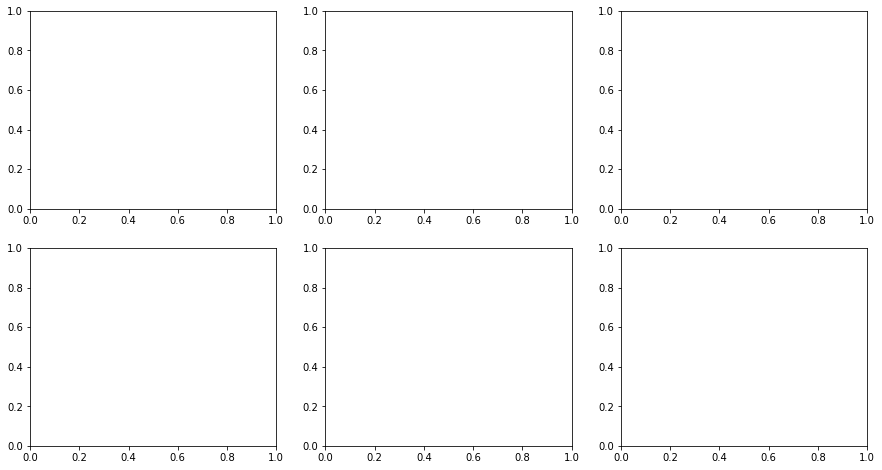

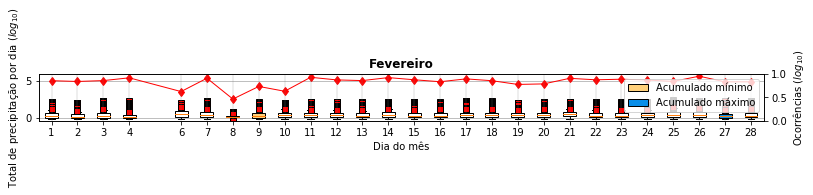

In [29]:
fig, ax = plt.subplots(2, 3, figsize=(15, 8))

ax[0, 0] = plot_precipitation(df)
ax[0, 0].plot()
plt.show()


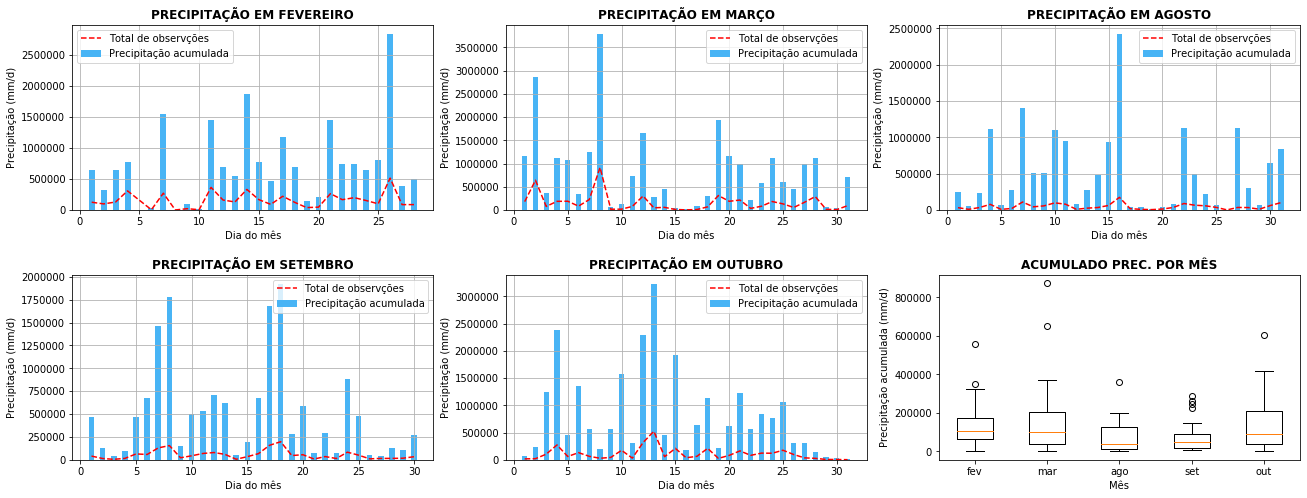

In [275]:
fig, ax = plt.subplots(2, 3, figsize=(22, 8))

dfsum = df.groupby('day').agg({'precipit': ['sum', 'count']})
pcoun = list(map(float, dfsum['precipit']['count'].values.ravel())) 
psum = list(map(float, dfsum['precipit']['sum'].values.ravel()))
isum = list(map(int, dfsum.index))
ax[0, 0].bar(isum, psum, color='#48B4F5', width=.5, label='Precipitação acumulada')
ax[0, 0].plot(isum, pcoun, 'r--', label='Total de observções')
ax[0, 0].set_title('PRECIPITAÇÃO EM FEVEREIRO', fontdict={'fontweight': 'semibold'})
ax[0, 0].legend()

dfsum = df2.groupby('day').agg({'precipit': ['sum', 'count']})
pcoun = list(map(float, dfsum['precipit']['count'].values.ravel())) 
psum = list(map(float, dfsum['precipit']['sum'].values.ravel()))
isum = list(map(int, dfsum.index))
ax[0, 1].bar(isum, psum, color='#48B4F5', width=.5, label='Precipitação acumulada')
ax[0, 1].plot(isum, pcoun, 'r--', label='Total de observções')
ax[0, 1].set_title('PRECIPITAÇÃO EM MARÇO', fontdict={'fontweight': 'semibold'})
ax[0, 1].legend()

dfsum = df3.groupby('day').agg({'precipit': ['sum', 'count']})
pcoun = list(map(float, dfsum['precipit']['count'].values.ravel())) 
psum = list(map(float, dfsum['precipit']['sum'].values.ravel()))
isum = list(map(int, dfsum.index))
ax[0, 2].bar(isum, psum, color='#48B4F5', width=.5, label='Precipitação acumulada')
ax[0, 2].plot(isum, pcoun, 'r--', label='Total de observções')
ax[0, 2].set_title('PRECIPITAÇÃO EM AGOSTO', fontdict={'fontweight': 'semibold'})
ax[0, 2].legend()

dfsum = df4.groupby('day').agg({'precipit': ['sum', 'count']})
pcoun = list(map(float, dfsum['precipit']['count'].values.ravel())) 
psum = list(map(float, dfsum['precipit']['sum'].values.ravel()))
isum = list(map(int, dfsum.index))
ax[1, 0].bar(isum, psum, color='#48B4F5', width=.5, label='Precipitação acumulada')
ax[1, 0].plot(isum, pcoun, 'r--', label='Total de observções')
ax[1, 0].set_title('PRECIPITAÇÃO EM SETEMBRO', fontdict={'fontweight': 'semibold'})
ax[1, 0].legend()

dfsum = df5.groupby('day').agg({'precipit': ['sum', 'count']})
pcoun = list(map(float, dfsum['precipit']['count'].values.ravel())) 
psum = list(map(float, dfsum['precipit']['sum'].values.ravel()))
isum = list(map(int, dfsum.index))
ax[1, 1].bar(isum, psum, color='#48B4F5', width=.5, label='Precipitação acumulada')
ax[1, 1].plot(isum, pcoun, 'r--', label='Total de observções')
ax[1, 1].legend()
ax[1, 1].set_xlabel('Dia do mês')
ax[1, 1].set_title('PRECIPITAÇÃO EM OUTUBRO', fontdict={'fontweight': 'semibold'})

m1 = df.groupby('day').agg({'vil': ['sum']})['vil']['sum'].values.ravel()
m2 = df2.groupby('day').agg({'vil': ['sum']})['vil']['sum'].values.ravel()
m3 = df3.groupby('day').agg({'vil': ['sum']})['vil']['sum'].values.ravel()
m4 = df4.groupby('day').agg({'vil': ['sum']})['vil']['sum'].values.ravel()
m5 = df5.groupby('day').agg({'vil': ['sum']})['vil']['sum'].values.ravel()
ax[1, 2].boxplot([m1, m2, m3, m4, m5], labels=('fev', 'mar', 'ago', 'set', 'out'))
ax[1, 2].set_title('ACUMULADO PREC. POR MÊS', fontdict={'fontweight': 'semibold'})
ax[1, 2].set_xlabel('Mês')
ax[1, 2].set_ylabel('Precipitação acumulada (mm/d)')
# ax[1, 2].xticks()

# ax[0, 0].xticks(step=1)
ax[0, 0].grid()
ax[0, 1].grid()
ax[0, 2].grid()
ax[1, 0].grid()
ax[1, 1].grid()
ax[0, 0].set_ylabel('Precipitação (mm/d)')
ax[0, 1].set_ylabel('Precipitação (mm/d)')
ax[0, 2].set_ylabel('Precipitação (mm/d)')
ax[1, 0].set_ylabel('Precipitação (mm/d)')
ax[1, 1].set_ylabel('Precipitação (mm/d)')
ax[0, 0].set_xlabel('Dia do mês')
ax[0, 1].set_xlabel('Dia do mês')
ax[0, 2].set_xlabel('Dia do mês')
ax[1, 0].set_xlabel('Dia do mês')

# fig.delaxes(ax[1][2])

plt.subplots_adjust(hspace=0.35)
plt.savefig('./images/results/overview_precipit.png', \
           bbox_inches='tight', transparent="False", pad_inches=0.1)
plt.show()

In [219]:
m1

array([6.43364900e+05, 3.24881832e+05, 6.49882187e+05, 7.81461360e+05,
       2.86164752e+04, 1.55033643e+06, 6.70756100e+02, 1.04116097e+05,
       2.25344629e+04, 1.44975160e+06, 6.93732697e+05, 5.49555276e+05,
       1.87652429e+06, 7.72094898e+05, 4.72442521e+05, 1.17110463e+06,
       6.86411126e+05, 1.51962419e+05, 2.04410172e+05, 1.45747978e+06,
       7.38324405e+05, 7.50069606e+05, 6.43136174e+05, 8.10536077e+05,
       2.84461066e+06, 3.86718165e+05, 4.96771963e+05])

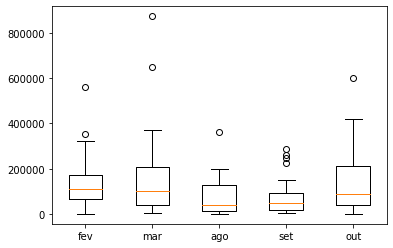

In [230]:
m1 = df.groupby('day').agg({'vil': ['sum']})['vil']['sum'].values.ravel()
m2 = df2.groupby('day').agg({'vil': ['sum']})['vil']['sum'].values.ravel()
m3 = df3.groupby('day').agg({'vil': ['sum']})['vil']['sum'].values.ravel()
m4 = df4.groupby('day').agg({'vil': ['sum']})['vil']['sum'].values.ravel()
m5 = df5.groupby('day').agg({'vil': ['sum']})['vil']['sum'].values.ravel()

plt.boxplot([m1, m2, m3, m4, m5])
plt.xticks((1, 2, 3, 4, 5), ('fev', 'mar', 'ago', 'set', 'out'))
plt.show()

In [135]:
lfeb = df.agg({'yyyyy_xx1': ['sum'], 'yyyyy_xx2': ['sum'], \
        'yyyyyyy_xx3': ['sum'], 'yyy_xx4': ['sum'],\
        'yyy_xx5': ['sum']})
lmar = df2.agg({'yyyyy_xx1': ['sum'], 'yyyyy_xx2': ['sum'], \
        'yyyyyyy_xx3': ['sum'], 'yyy_xx4': ['sum'],\
        'yyy_xx5': ['sum']})
laug = df3.agg({'yyyyy_xx1': ['sum'], 'yyyyy_xx2': ['sum'], \
        'yyyyyyy_xx3': ['sum'], 'yyy_xx4': ['sum'],\
        'yyy_xx5': ['sum']})
lsep = df4.agg({'yyyyy_xx1': ['sum'], 'yyyyy_xx2': ['sum'], \
        'yyyyyyy_xx3': ['sum'], 'yyy_xx4': ['sum'],\
        'yyy_xx5': ['sum']})
loct = df5.agg({'yyyyy_xx1': ['sum'], 'yyyyy_xx2': ['sum'], \
        'yyyyyyy_xx3': ['sum'], 'yyy_xx4': ['sum'],\
        'yyy_xx5': ['sum']})

In [178]:
df5['yyyyyyy_xx3'].sum()

95761.0

In [160]:
m5

array([  996.,  2425., 95761., 56231., 57684.])

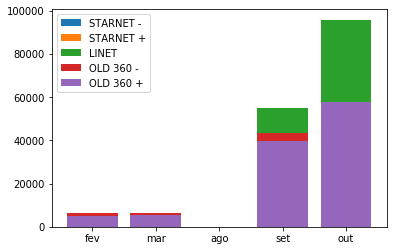

In [179]:
m1 = lfeb.values.ravel()
m2 = lmar.values.ravel()
m3 = laug.values.ravel()
m4 = lsep.values.ravel()
m5 = loct.values.ravel()

ys1 = (m1[0], m2[0], m3[0], m4[0], m5[0])
ys2 = (m1[1], m2[1], m3[1], m4[1], m5[1])
ys3 = (m1[2], m2[2], m3[2], m4[2], m5[2])
ys4 = (m1[3], m2[3], m3[3], m4[3], m5[3])
ys5 = (m1[4], m2[4], m3[4], m4[4], m5[4])
x = (0, 1, 2, 3, 4)

plt.bar(x, ys1, label='STARNET -')
plt.bar(x, ys2, label='STARNET +')
plt.bar(x, ys3, label='LINET')
plt.bar(x, ys4, label='OLD 360 -')
plt.bar(x, ys5, label='OLD 360 +')
plt.xticks(x, ('fev', 'mar', 'ago', 'set', 'out'))
# plt.
plt.legend()
plt.show()

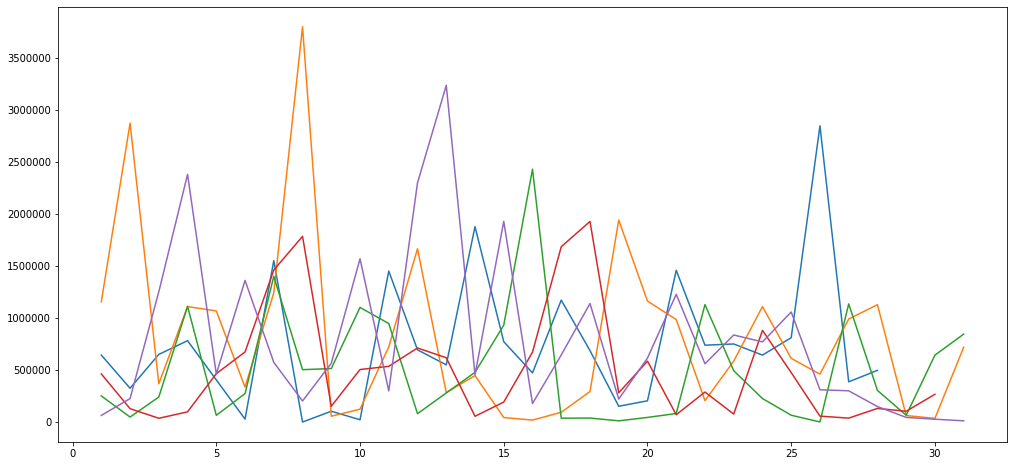

In [58]:
# fig, ax = plt.subplots(2, 3, figsize=(17, 8))

plt.figure(figsize=(17, 8))
dfsum = df.groupby('day').agg({'precipit': ['sum']})
psum = list(map(float, dfsum['precipit'].values.ravel()))
isum = list(map(int, dfsum.index))
plt.plot(isum, psum)

dfsum = df2.groupby('day').agg({'precipit': ['sum']})
psum = list(map(float, dfsum['precipit'].values.ravel()))
isum = list(map(int, dfsum.index))
plt.plot(isum, psum)

dfsum = df3.groupby('day').agg({'precipit': ['sum']})
psum = list(map(float, dfsum['precipit'].values.ravel()))
isum = list(map(int, dfsum.index))
plt.plot(isum, psum)

dfsum = df4.groupby('day').agg({'precipit': ['sum']})
psum = list(map(float, dfsum['precipit'].values.ravel()))
isum = list(map(int, dfsum.index))
plt.plot(isum, psum)

dfsum = df5.groupby('day').agg({'precipit': ['sum']})
psum = list(map(float, dfsum['precipit'].values.ravel()))
isum = list(map(int, dfsum.index))
plt.plot(isum, psum)

plt.show()

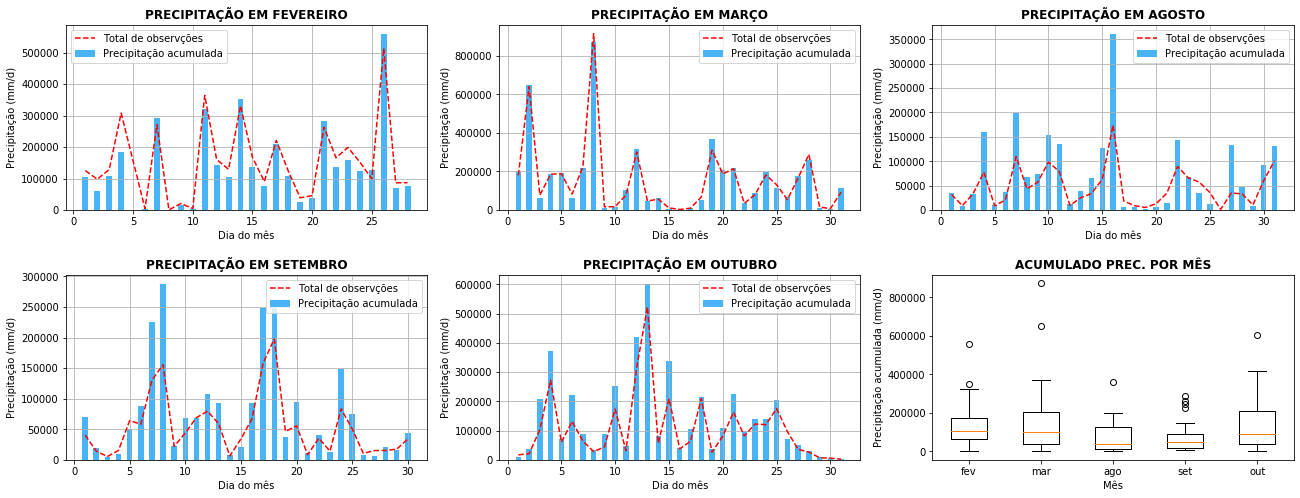

In [277]:
fig, ax = plt.subplots(2, 3, figsize=(22, 8))

dfsum = df.groupby('day').agg({'vil': ['sum', 'count']})
pcoun = list(map(float, dfsum['vil']['count'].values.ravel())) 
psum = list(map(float, dfsum['vil']['sum'].values.ravel()))
isum = list(map(int, dfsum.index))
ax[0, 0].bar(isum, psum, color='#48B4F5', width=.5, label='Precipitação acumulada')
ax[0, 0].plot(isum, pcoun, 'r--', label='Total de observções')
ax[0, 0].set_title('PRECIPITAÇÃO EM FEVEREIRO', fontdict={'fontweight': 'semibold'})
ax[0, 0].legend()

dfsum = df2.groupby('day').agg({'vil': ['sum', 'count']})
pcoun = list(map(float, dfsum['vil']['count'].values.ravel())) 
psum = list(map(float, dfsum['vil']['sum'].values.ravel()))
isum = list(map(int, dfsum.index))
ax[0, 1].bar(isum, psum, color='#48B4F5', width=.5, label='Precipitação acumulada')
ax[0, 1].plot(isum, pcoun, 'r--', label='Total de observções')
ax[0, 1].set_title('PRECIPITAÇÃO EM MARÇO', fontdict={'fontweight': 'semibold'})
ax[0, 1].legend()

dfsum = df3.groupby('day').agg({'vil': ['sum', 'count']})
pcoun = list(map(float, dfsum['vil']['count'].values.ravel())) 
psum = list(map(float, dfsum['vil']['sum'].values.ravel()))
isum = list(map(int, dfsum.index))
ax[0, 2].bar(isum, psum, color='#48B4F5', width=.5, label='Precipitação acumulada')
ax[0, 2].plot(isum, pcoun, 'r--', label='Total de observções')
ax[0, 2].set_title('PRECIPITAÇÃO EM AGOSTO', fontdict={'fontweight': 'semibold'})
ax[0, 2].legend()

dfsum = df4.groupby('day').agg({'vil': ['sum', 'count']})
pcoun = list(map(float, dfsum['vil']['count'].values.ravel())) 
psum = list(map(float, dfsum['vil']['sum'].values.ravel()))
isum = list(map(int, dfsum.index))
ax[1, 0].bar(isum, psum, color='#48B4F5', width=.5, label='Precipitação acumulada')
ax[1, 0].plot(isum, pcoun, 'r--', label='Total de observções')
ax[1, 0].set_title('PRECIPITAÇÃO EM SETEMBRO', fontdict={'fontweight': 'semibold'})
ax[1, 0].legend()

dfsum = df5.groupby('day').agg({'vil': ['sum', 'count']})
pcoun = list(map(float, dfsum['vil']['count'].values.ravel())) 
psum = list(map(float, dfsum['vil']['sum'].values.ravel()))
isum = list(map(int, dfsum.index))
ax[1, 1].bar(isum, psum, color='#48B4F5', width=.5, label='Precipitação acumulada')
ax[1, 1].plot(isum, pcoun, 'r--', label='Total de observções')
ax[1, 1].legend()
ax[1, 1].set_xlabel('Dia do mês')
ax[1, 1].set_title('PRECIPITAÇÃO EM OUTUBRO', fontdict={'fontweight': 'semibold'})

m1 = df.groupby('day').agg({'vil': ['sum']})['vil']['sum'].values.ravel()
m2 = df2.groupby('day').agg({'vil': ['sum']})['vil']['sum'].values.ravel()
m3 = df3.groupby('day').agg({'vil': ['sum']})['vil']['sum'].values.ravel()
m4 = df4.groupby('day').agg({'vil': ['sum']})['vil']['sum'].values.ravel()
m5 = df5.groupby('day').agg({'vil': ['sum']})['vil']['sum'].values.ravel()
ax[1, 2].boxplot([m1, m2, m3, m4, m5], labels=('fev', 'mar', 'ago', 'set', 'out'))
ax[1, 2].set_title('ACUMULADO PREC. POR MÊS', fontdict={'fontweight': 'semibold'})
ax[1, 2].set_xlabel('Mês')
ax[1, 2].set_ylabel('Precipitação acumulada (mm/d)')
# ax[1, 2].xticks()

# ax[0, 0].xticks(step=1)
ax[0, 0].grid()
ax[0, 1].grid()
ax[0, 2].grid()
ax[1, 0].grid()
ax[1, 1].grid()
ax[0, 0].set_ylabel('Precipitação (mm/d)')
ax[0, 1].set_ylabel('Precipitação (mm/d)')
ax[0, 2].set_ylabel('Precipitação (mm/d)')
ax[1, 0].set_ylabel('Precipitação (mm/d)')
ax[1, 1].set_ylabel('Precipitação (mm/d)')
ax[0, 0].set_xlabel('Dia do mês')
ax[0, 1].set_xlabel('Dia do mês')
ax[0, 2].set_xlabel('Dia do mês')
ax[1, 0].set_xlabel('Dia do mês')

# fig.delaxes(ax[1][2])

plt.subplots_adjust(hspace=0.35)
plt.savefig('./images/results/overview_precipit.png', \
           bbox_inches='tight', transparent="False", pad_inches=0.1)
plt.show()

In [581]:
df['lon'].values

array([-59.6314, -59.6114, -59.6314, ..., -59.9914, -60.0314, -60.0114])

/home/adriano/.local/lib/python3.7/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  app.launch_new_instance()


TypeError: 'float' object is not callable

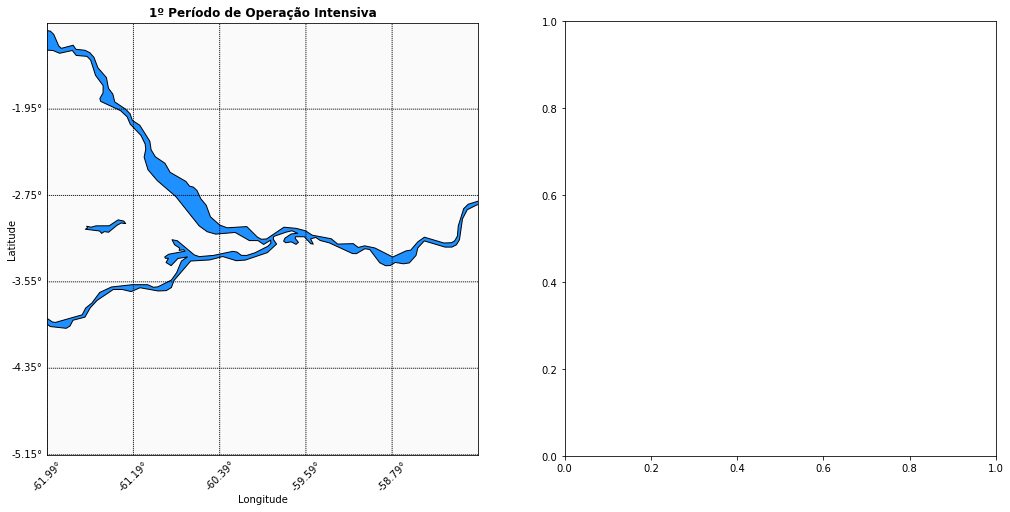

In [101]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17, 8))
n, s, w, e = -0.991217, -5.30485, -62.1561, -57.8267
m = (n-s)/2
c = (w-e)/2
latm = n-m
lonm = w-c
my_coords = [float('%.2f'%latm), float('%.2f'%lonm)]
zoom_scale = 2
font = {'fontweight': 'semibold'}

bbox = [my_coords[0]-zoom_scale,my_coords[0]+zoom_scale,\
        my_coords[1]-zoom_scale,my_coords[1]+zoom_scale]

ax1.set_title('1º Período de Operação Intensiva', fontdict=font)
map = Basemap(projection='merc',llcrnrlat=bbox[0],urcrnrlat=bbox[1],\
            llcrnrlon=bbox[2],urcrnrlon=bbox[3],lat_ts=10,resolution='i',  ax=ax1)
map.drawcoastlines()
map.fillcontinents(color='#FAFAFA',lake_color='dodgerblue')
map.drawparallels(np.arange(bbox[0],bbox[1],(bbox[1]-bbox[0])/5), \
                  labels=[1,0,0,0], labelstyle='+/-')
map.drawmeridians(np.arange(bbox[2],bbox[3],(bbox[3]-bbox[2])/5), \
                  labels=[0,0,0,1], labelstyle='+/-', rotation=45)
ax1.set_xlabel('Longitude', labelpad=40)
ax1.set_ylabel('Latitude', labelpad=30)
mat = np.zeros((241, 241))

temp = df.groupby(['ind_x', 'ind_y']).agg({'precipit': 'sum'})
for i, row in temp.iterrows():
    x, y, v = int(i[0]), int(i[1]), row['precipit']
    mat[x][y] = row['precipit']

temp = df2.groupby(['ind_x', 'ind_y']).agg({'precipit': 'sum'})
for i, row in temp.iterrows():
    x, y, v = int(i[0]), int(i[1]), row['precipit']
    mat[x][y] = row['precipit']
    
latmin = min(df['lat'].min(), df2['lat'].min())
lonmin = min(df['lon'].min(), df2['lon'].min()) 

latmax = max(df['lat'].max(), df2['lat'].max())
lonmax = max(df['lon'].max(), df2['lon'].max())

xlabel = ['%.2f'%x for x in np.linspace(lonmin, lonmax, 6)]
ylabel = ['%.2f'%x for x in np.linspace(latmax, latmin, 6)]

xi, yi = m(x, y)
cmap = plt.cm.get_cmap('jet')
cs = m.pcolormesh(xi,yi,z, cmap = cmap, ax=ax1)


# ax1.set_title('Precipitação acumulado IOP1', fontdict={'fontweight': 'semibold'})
# ax1.set_xlabel('latitude (°)')
# ax1.set_ylabel('longitude (°)')
# map.imshow(mat, cmap='jet', zorder=3, alpha=0.6)
# ax1.set_xticklabels(xlabel)
# ax1.set_yticklabels(ylabel)
# divider = make_axes_locatable(ax1)
# cax = divider.append_axes("right", size="5%", pad=0.05)
# fig.colorbar(cm1, ax=ax1, cax=cax)


In [100]:
z

[1.5927,
 1.2287,
 1.3551,
 1.689,
 1.3256,
 1.5428,
 1.8446,
 1.8401,
 1.1729,
 1.1558,
 2.0847,
 2.5605,
 2.5984,
 1.2561,
 2.2163,
 3.0465,
 1.9949,
 1.3853,
 2.5232,
 2.3274,
 1.8719,
 1.5278,
 1.1729,
 1.5927,
 1.5656,
 1.714,
 1.7825,
 1.5733,
 1.2049,
 2.2712,
 2.7489,
 1.5203,
 1.2653,
 2.7691,
 3.4431,
 2.6824,
 1.4945,
 1.4583,
 2.8308,
 2.4263,
 1.5203,
 1.8949,
 0.9477,
 0.9477,
 1.5532,
 1.8863,
 0.9824,
 1.0481,
 1.9136,
 1.3483,
 1.1209,
 1.7723,
 12.0254,
 18.5002,
 1.1902,
 4.8184,
 26.7064,
 4.3986,
 17.2748,
 21.6373,
 1.9507,
 1.391,
 1.8818,
 11.6489,
 1.0233,
 2.4795,
 2.2581,
 1.3777,
 1.4628,
 0.8651,
 1.8954,
 2.2853,
 2.4034,
 1.391,
 1.8196,
 13.36,
 13.1653,
 1.8459999999999999,
 1.1209,
 1.0996,
 1.8954,
 3.2514,
 3.2514,
 1.6024,
 12.8155,
 34.111999999999995,
 18.9586,
 2.4735,
 2.5951,
 2.6013,
 10.0088,
 28.8115,
 25.2445,
 14.7341,
 6.6834,
 1.7893,
 2.142,
 1.0038,
 1.1816,
 0.8128,
 7.4433,
 15.5873,
 20.3033,
 17.1485,
 1.6812,
 1.193,
 1.7553,
 0.8

In [98]:
total = 10000
x, y, z = [], [], []
for lon, lat, prec in df[['lon', 'lat', 'precipit']].values:
    x.append(lon)
    y.append(lat)
    z.append(prec)

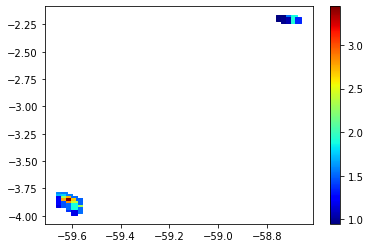

In [35]:
cm = plt.cm.get_cmap('jet')
sc = plt.scatter(x, y, c=z, vmin=min(z), vmax=max(z), cmap=cm, marker='s')
plt.colorbar(sc)
plt.show()